#### [Chapter 9](https://github.com/Ziaeemehr/mndynamics/blob/main/mndynamics/examples/Chap_09.ipynb)
<!-- - [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Ziaeemehr/mndynamics/main?labpath=mndynamics%2Fexamples%2FChap_09.ipynb) -->

**Spike Frequency Adaptation**

- Börgers, C., 2017. An introduction to modeling neuronal dynamics (Vol. 66). Berlin: Springer.

Code by : Abolfazl Ziaeemehr ([GitHub](https://github.com/Ziaeemehr))

<a href="https://colab.research.google.com/github/Ziaeemehr/mndynamics/blob/main/mndynamics/examples/Chap_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# uncomment and run this line to install the package
# !pip install mndynamics

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mndynamics.models.py.RTM_Base import RTM_M
from mndynamics.models.py.RTM_Base import RTM_AHP
from mndynamics.models.py.LIF_Base import LIF_Addapt

In [2]:
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
obj = RTM_M()
?obj

Signature:   obj() -> None
Type:        RTM_M
String form: Reduced Traub-Miles Model with M-current
File:        ~/git/02_ITNG_REPOs/MNDynamics/mndynamics/models/py/RTM_Base.py
Docstring:  
Reduced Traub-Miles neuron model with M-current
Simulate the model with parameters given in the dictionary par:

Usage:
>>> par = {'i_ext': 1.5, 't_end': 100.0, 'v0': -70.0, 'dt': 0.01}
>>> model = RTM_M(par)
>>> sol = model.simulate()
>>> plt.plot(sol['t'], sol['v'])


In [4]:
obj()

Reduced Traub-Miles Model with M-current


{'c': 1.0,
 'g_k': 80.0,
 'g_na': 100.0,
 'g_l': 0.1,
 'g_m': 0.25,
 'v_k': -100.0,
 'v_na': 50.0,
 'v_l': -67.0,
 'i_ext': 1.5,
 't_end': 100.0,
 'v0': -70.0,
 'dt': 0.01}

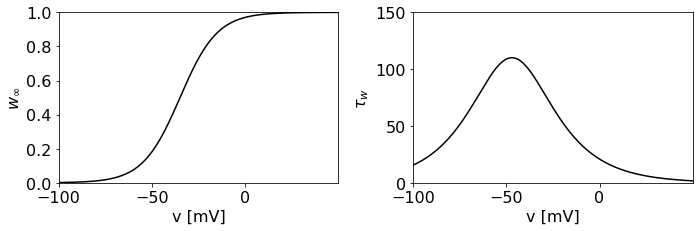

In [5]:
v = np.arange(-100, 50, 0.1)
obj = RTM_M()
w_inf = obj.w_inf(v)
tau_m = obj.tau_w(v)

# plot
fig, ax = plt.subplots(1,2, figsize=(10,3.5), sharex=True)
ax[0].plot(v, w_inf, 'k')
ax[0].set_ylabel(r'$w_{\infty}$')
ax[0].set_xlabel('v [mV]')
ax[1].plot(v, tau_m, 'k')
ax[1].set_ylabel(r'$\tau_w$')
ax[1].set_xlabel('v [mV]')
ax[0].margins(x=0.0)
ax[1].margins(x=0.0)
ax[0].set_ylim(0,1)
ax[1].set_ylim(0,150)

ax[1].set_yticks([0,50,100,150])
plt.tight_layout()


In [6]:
obj = RTM_M({'i_ext': 1.5, "t_end": 300})
data = obj.simulate()
t = data["t"]
v = data["v"]
w = data['w']

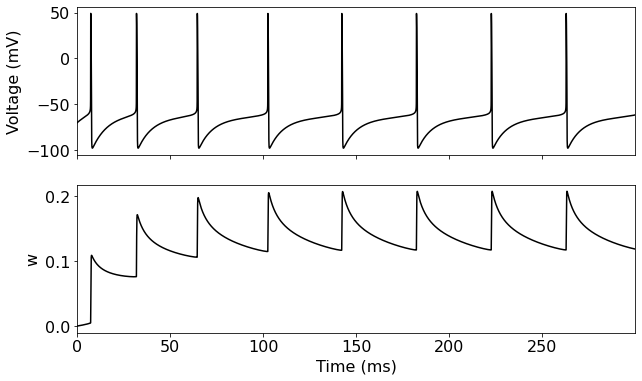

In [7]:
fig, ax = plt.subplots(2,1, figsize=(10,6), sharex=True)
ax[0].plot(t, v, 'k')
ax[1].plot(t, w, 'k')
ax[1].set_xlabel("Time (ms)")
ax[0].set_ylabel("Voltage (mV)")
ax[1].set_ylabel("w")
ax[0].margins(x=0.0)

In [8]:
obj = RTM_M({'i_ext': 0.0, "t_end": 600})
data = obj.simulate()
t = data["t"]
v = data["v"]
w = data['w']

(0.0, 0.05)

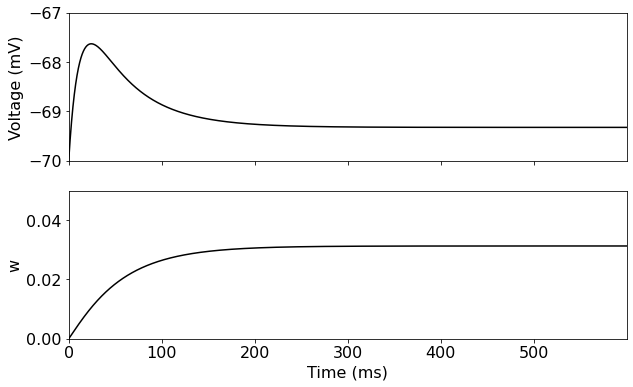

In [9]:
fig, ax = plt.subplots(2,1, figsize=(10,6), sharex=True)
ax[0].plot(t, v, 'k')
ax[1].plot(t, w, 'k')
ax[1].set_xlabel("Time (ms)")
ax[0].set_ylabel("Voltage (mV)")
ax[1].set_ylabel("w")
ax[0].margins(x=0.0)
ax[0].set_ylim(-70, -67)
ax[1].set_ylim(0, 0.05)

With $I = 0$. The M-current gives rise to a weak but significant constant potassium conductance at rest. [`RTM_M_RESTING`]

In [10]:
obj = RTM_AHP({'i_ext': 1.5, "t_end": 300})
data = obj.simulate()
t = data["t"]
v = data["v"]
ca = data['ca']

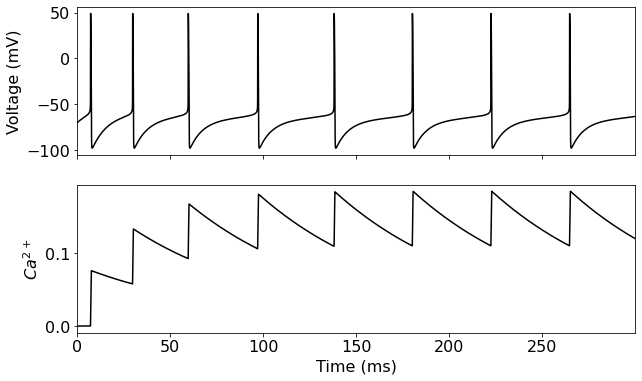

In [11]:
fig, ax = plt.subplots(2,1, figsize=(10,6), sharex=True)
ax[0].plot(t, v, 'k')
ax[1].plot(t, ca, 'k')
ax[1].set_xlabel("Time (ms)")
ax[0].set_ylabel("Voltage (mV)")
ax[1].set_ylabel(r"$Ca^{2+}$")
ax[0].margins(x=0.0)

Buildup of the calcium concentration activates an AHP
current, and thereby decelerates firing of the RTM neuron. In this simulation, $g_{AHP} =0.25mS/cm^2$ and $I =1.5 \mu A/cm^2$. [`RTM_AHP`]

In [12]:
obj = RTM_AHP({'i_ext': 0.0, "t_end": 600})
data = obj.simulate()
t = data["t"]
v = data["v"]
ca = data['ca']

(0.0, 0.005)

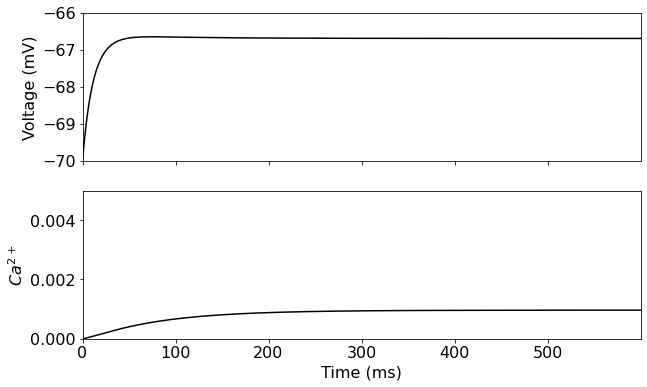

In [13]:
fig, ax = plt.subplots(2,1, figsize=(10,6), sharex=True)
ax[0].plot(t, v, 'k')
ax[1].plot(t, ca, 'k')
ax[1].set_xlabel("Time (ms)")
ax[0].set_ylabel("Voltage (mV)")
ax[1].set_ylabel(r"$Ca^{2+}$")
ax[0].margins(x=0.0)
ax[0].set_ylim(-70, -66)
ax[1].set_ylim(0, 0.005)

In [14]:
obj = LIF_Addapt()
obj()

Linear Integrate-and-Fire (LIF) Model with Adaptation


{'c': 1.0,
 'tau_m': 10.0,
 'tau_w': 40.0,
 'delta': 0.05,
 'i_ext': 0.13,
 'v0': 0.0,
 'dt': 0.01,
 't_end': 300.0}

In [15]:
obj = LIF_Addapt()
data = obj.simulate()
t = data["t"]
v = data["v"]
w = data['w']


(0.0, 0.1)

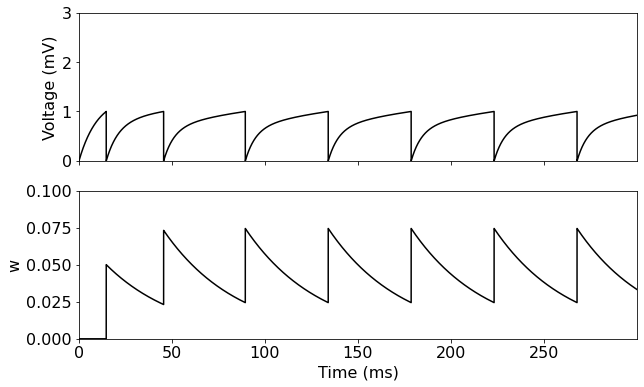

In [16]:
fig, ax = plt.subplots(2,1, figsize=(10,6), sharex=True)
ax[0].plot(t, v, 'k')
ax[1].plot(t, w, 'k')
ax[1].set_xlabel("Time (ms)")
ax[0].set_ylabel("Voltage (mV)")
ax[1].set_ylabel(r"w")
ax[0].margins(x=0.0)
ax[0].set_ylim(0, 3)
ax[1].set_ylim(0, 0.1)

#### ADAPTATION_MAP

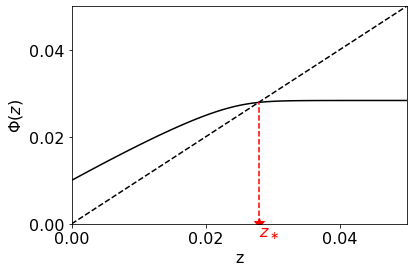

In [37]:
tau_m = 10
I = 0.12
tau_w = 100
delta = 0.01
z_max = 0.05
period = tau_m*np.log(tau_m*I/(tau_m*I-1))
frequency = 1000/period

dt = 0.01
dt05 = dt/2

N = 100

v = np.zeros(N+1)
w = np.arange(N+1) / N * z_max
phi = np.zeros(N+1)
t = 0

done = np.zeros(N+1, dtype=int)

while np.min(done) == 0:
    t_old = t
    v_old = v
    w_old = w
    v_inc = -v/tau_m+I-w*v
    w_inc = -w/tau_w
    v_tmp = v+dt05*v_inc
    w_tmp = w+dt05*w_inc
    v_inc = -v_tmp/tau_m+I-w_tmp*v_tmp
    w_inc = -w_tmp/tau_w
    v = v+dt*v_inc
    w = w+dt*w_inc
    t = t+dt
    # find index of element where v crosses 1 and done is 0
    ind = np.where((v > 1) & (done == 0))[0]
    done[ind] = 1
    phi[ind] = (v[ind]-1)*w_old[ind]+(1-v_old[ind])*w[ind]
    phi[ind] = phi[ind]/(v[ind]-v_old[ind])+delta

fig, ax = plt.subplots(1,1, figsize=(6,4))
z = np.arange(N+1) / N * z_max
ax.plot(z, phi, 'k')
ax.set_xlim(0, z_max)
ax.set_ylim(0, z_max)
ax.set_xlabel("z")
ax.plot([0, z_max], [0, z_max], 'k--')
ax.set_ylabel(r"$\Phi(z)$")
ax.set_xticks([0,0.02, 0.04])
ax.set_yticks([0,0.02, 0.04])

ax.plot([0.02791,0.02791],[0,0.02791], 'r--')
ax.plot(0.02791, 0.0001, 'r*', ms=10)
ax.text(0.02791, -0.003, r"$z_\ast$", color='r');
